# Cleaning the data

My client's question is : "Where should I buy an appartment to rent it afterwards at the best price ?"

In this part, I will :

1) Drop the duplicates (if there are any)
2) Deleting the rows with no price, no number of rooms and no living area.
3) Defining the empty values in garden, furnished and fully equipped kitchen as False (Supposing if there is any, it would be written in the announce)
4) Deleting the not needed columns such as Area of the terrace, Area of the garden, State of the building, Surface area of the plot of land, Surface of the land, Number of façades

Finally, I got a dataset without any empty cells.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../.gitignore/data_a (Florent).csv", skipinitialspace = True) #Open the csv file with no space before and after the values


#Part 1 : cleaning the data

#A. Drop the duplicates

nb_of_duplicates = len(df)-len(df.drop_duplicates()) #How many duplicates do I have ?

if nb_of_duplicates != 0 :
    df.drop_duplicates(inplace=True)

#B. Empty cells :

df.isnull().sum() #How many empty cells are there for each column

cleaned_df = df.dropna(subset=['Price'])#Delete the 3992 empty price
cleaned_df = cleaned_df.dropna(subset=['Number of rooms'])#Delete the 1918 empty Number of rooms
cleaned_df = cleaned_df.dropna(subset=['Living Area'])#Delete the 11677 empty Living Area (60605 left)

cleaned_df["Garden"].fillna(False, inplace = True) #Replace NaN value by False in the Garden Column
cleaned_df["Furnished"].fillna(False, inplace = True) #Replace NaN value by False in the Furnished Column
cleaned_df["Fully equipped kitchen"].fillna(False, inplace = True) #Replace NaN value by False in the Furnished Column

del cleaned_df['Area of the terrace'] #Delete the column Area of the terrace
del cleaned_df['Area of the garden'] #Delete the column Area of the garden
del cleaned_df['State of the building'] #Delete the column State of the building
del cleaned_df['Surface area of the plot of land'] #Delete the column Surface area of the plot of land
del cleaned_df['Surface of the land'] #Delete the column Surface area of land
del cleaned_df['Number of facades'] #Delete the column Number of facades

nb_null_values = cleaned_df.isnull().sum()
print(nb_null_values)

#C. No blank spaces 
# Already done in the opening of the csv file



Unnamed: 0                0
To rent                   0
To sell                   0
Price                     0
Number of rooms           0
Living Area               0
Fully equipped kitchen    0
Furnished                 0
Open fire                 0
Terrace                   0
Garden                    0
Swimming pool             0
zipcode                   0
type                      0
dtype: int64


# Converting the data in the right type

1) I'll use the `df.convert_dtypes()` method on my dataframe to convert as many columns as possible in the right format for them
2) I'll convert the columns Price, Living Area and Numbers of rooms into float because it'll be needed further.
3) I'll only take the buildings to rent in a new dataframe called `df_rent`
4) I'll delete the extreme price and living area (named outliers) from my `df_rent` dataframe.

In [137]:
#D. Data in wrong format

cleaned_df_formatted = cleaned_df.convert_dtypes() #convert all the dtypes in the best types for them
cleaned_df_formatted['Price'] = cleaned_df_formatted['Price'].astype(float)
cleaned_df_formatted['Living Area'] = cleaned_df_formatted['Living Area'].astype(float)
cleaned_df_formatted['Number of rooms'] = cleaned_df_formatted['Number of rooms'].astype(float)

#E. Wrong data

index_rent_to_del = cleaned_df_formatted[(cleaned_df_formatted['To rent'] == False)].index # taking the index of the row who are False to delete them on the next line
df_rent = cleaned_df_formatted.drop(index_rent_to_del) #Delete the rows collect the line above and store the new DF in df_rent
del df_rent['To sell'] #Delete the column "To sell" because it is useless now
del df_rent['To rent'] #Delete the column "To rent" because it is useless now


# Sorting the dataframe (DF) and adding some new columns

1) I'll only take the "appartement" and "Rez-de-chaussée" to make a new one with them
2) I'll calculate and add in a new column the "Price per square m" and the "Price per bedroom"

In [138]:
#Creating some specific Dataframe to plot

#Taking only the appartment and Rez-de-chaussée to rent 
df_rent_appart = df_rent[(df_rent['type'] == "Appartement") | (df_rent['type'] == "Rez-de-chaussée")].copy() #copy() needed to have no copy warnings !

#Calculating the price per squared m for the appartment and Rez-de-chaussée to rent
df_rent_appart['Price per square m'] = df_rent_appart['Price'] / df_rent_appart['Living Area']

#Calculating the price per bedroom m for the appartment and Rez-de-chaussée to rent
df_rent_appart['Price per bedroom'] = df_rent_appart['Price'] / df_rent_appart['Number of rooms']

#Deleting the column type who is useless now
del df_rent_appart['type']
del df_rent_appart['Unnamed: 0']

In [139]:
#Part 2 : Data Analysis

#How many rows and columns ?

def how_many_columns_rows_df(df):
    vnames = [name for name in globals() if globals()[name] is df]#Getting the name of the df
    print(f"There are {df.shape[0]} rows in our database named {vnames[0]}") #How many rows ?
    print(f"There are {df.shape[1]} columns in our database named {vnames[0]}") #How many columns ?
    return None

how_many_columns_rows_df(cleaned_df_formatted)
how_many_columns_rows_df(df_rent_appart)

There are 60605 rows in our database named cleaned_df_formatted
There are 14 columns in our database named cleaned_df_formatted
There are 8744 rows in our database named df_rent_appart
There are 12 columns in our database named df_rent_appart


In [140]:
df_rent_appart.head(10)

,Price,Number of rooms,Living Area,Fully equipped kitchen,Furnished,Open fire,Terrace,Garden,Swimming pool,zipcode,Price per square m,Price per bedroom
1,790.0,2.0,140.0,True,False,False,False,False,False,3200,5.642857,395.0
3,520.0,2.0,50.0,True,False,False,False,False,False,6900,10.400000,260.0
4,760.0,1.0,55.0,True,False,False,True,True,False,1470,13.818182,760.0
6,660.0,2.0,95.0,True,False,False,False,False,False,4920,6.947368,330.0
7,925.0,2.0,100.0,True,False,False,True,False,False,1853,9.250000,462.5
14,1650.0,2.0,84.0,False,True,False,True,False,False,2060,19.642857,825.0
15,1650.0,2.0,84.0,True,True,False,True,False,False,2060,19.642857,825.0
17,860.0,2.0,95.0,True,False,False,True,False,False,6061,9.052632,430.0
27,1300.0,2.0,93.0,True,True,False,False,False,False,2060,13.978495,650.0
30,950.0,1.0,80.0,True,False,False,False,False,False,1050,11.875000,950.0


In [151]:
df_rent_appart.head(1)

,Price,Number of rooms,Living Area,Fully equipped kitchen,Furnished,Open fire,Terrace,Garden,Swimming pool,zipcode,Price per square m,Price per bedroom
1,790.0,2.0,140.0,True,False,False,False,False,False,3200,5.642857,395.0


In [155]:

#Automatization deleting the outliers with the quantile function

def deleting_outliers (df : pd.core.frame.DataFrame) -> pd.core.frame.DataFrame : 

    for column in df.columns :

        #Calculating Q1
        Q1 = df_rent_appart["column"].quantile(q=0.25)

        #Calculating Q3
        Q3 = df_rent_appart["column"].quantile(q=0.75)

        #Calculating interquartile range
        IQR = Q3 - Q1
        print(f"The IQR is : {IQR}")

        #Calculating the lower boundary with Q1 and IQR
        low_bound = Q1 - 1.5*IQR
        print(f"The {low_bound}")

        #Calculating the upper boundary with Q3 and IQR
        up_bound = Q3 + 1.5*IQR
        print(up_bound)

        #Keeping the values between the 2 boundaries
        df = df[df[column] < up_bound]
        df = df[df[column] > low_bound]

In [158]:
type(df_rent_appart.columns)
#df_tested = deleting_outliers(df_rent_appart)

pandas.core.indexes.base.Index

In [141]:
def corr_and_plot(df : pd.core.frame.DataFrame, var_cor_1: str, var_cor_2: str, plot_type: str):
    """This function calculate the correlation between 2 variables who are the dataframe's column's name and plot them afterwards"""
    corr = df[var_cor_1].corr(df[var_cor_2])
    print("Correlation between ", var_cor_1, " and ", var_cor_2, "is: ", round(corr, 2))

    df.plot(x=var_cor_1, y=var_cor_2, kind=plot_type, title="Appartment to rent")
    plt.show()




Correlation between  Price  and  Living Area is:  0.06


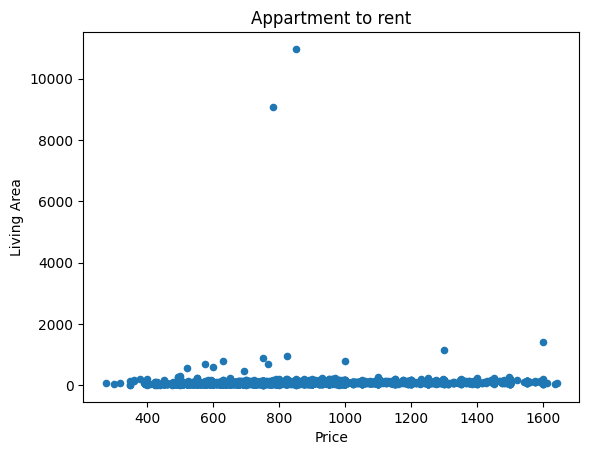

In [143]:
#What is the correlation between the variables and the price ? (Why might that be?)

corr_and_plot(df_rent_appart, "Price", "Living Area", "scatter")

After seeing the plot, I decide to delete the extrems values for the renting price (> 10000) and living area (> 2000)

In [144]:
#Delete the extreme prices and extreme living area from df_rent

df_rent_appart = df_rent_appart.drop(df_rent_appart[df_rent_appart['Price'] > 10000].index)

#df_rent.drop(df_rent[df_rent['Price'] >= 4000].index, inplace = True)
#df_rent.drop(df_rent[df_rent['Living Area'] > 400].index, inplace = True)

Correlation between  Price  and  Living Area is:  0.06


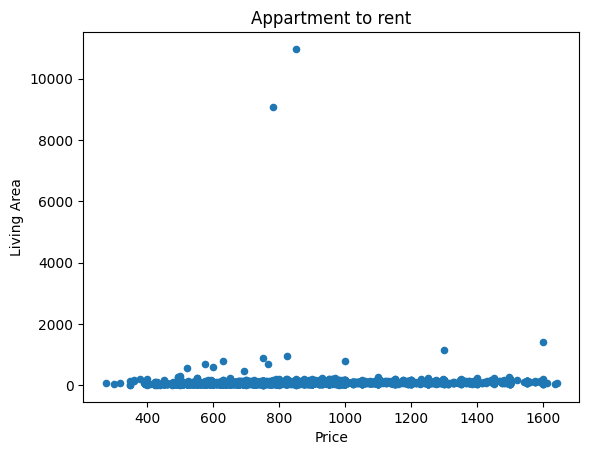

In [145]:
#What is the correlation between the variables and the price ? (Why might that be?)

corr_and_plot(df_rent_appart, "Price", "Living Area", "scatter")

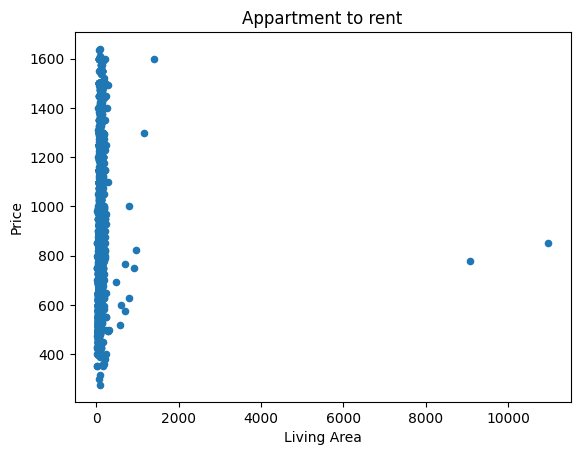

In [146]:
#Plotting the correlation between Living Area and the price for renting appartment
df_rent_appart.plot(x='Living Area', y='Price', kind='scatter', title="Appartment to rent")
plt.show()

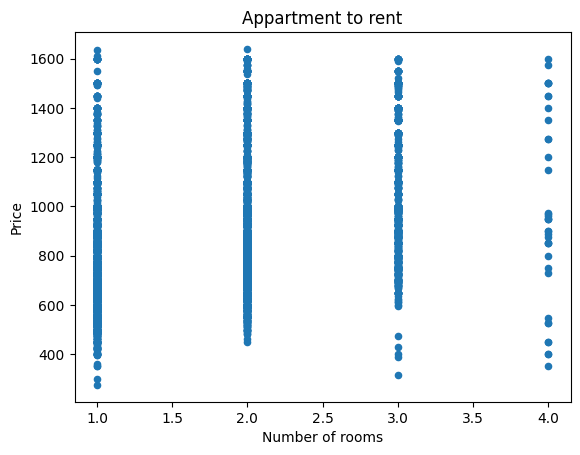

In [147]:
#Plotting the correlation between number of rooms and the price for renting appartment

to_plot = df_rent_appart[(df_rent_appart['Number of rooms']>=5)].index.copy() #Because there are only 4 appartments with more than 5 bedrooms
df_rent_appart.drop(to_plot, inplace=True) #deleting the extrem number of rooms after seeing the first plot

df_rent_appart.plot(x='Number of rooms', y='Price', kind='scatter', title="Appartment to rent")
plt.show()

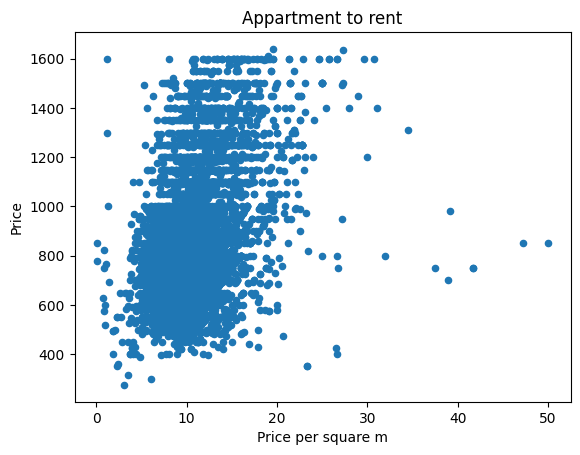

In [148]:
#Plotting the correlation between price by squared m and the price for renting appartment
df_rent_appart.plot(x='Price per square m', y='Price', kind='scatter', title="Appartment to rent")
plt.show()

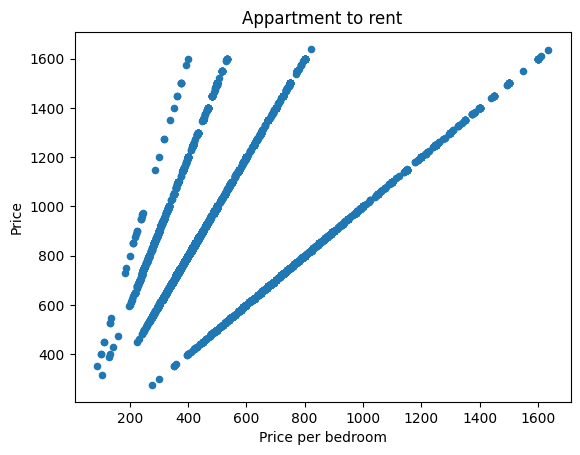

In [149]:
#Plotting the correlation between price by bedroom and the price for renting appartment
df_rent_appart.plot(x='Price per bedroom', y='Price', kind='scatter', title="Appartment to rent")
plt.show()

In [150]:
#Selling appartements

#Correlation between Price and Living Area for selling appartments
col1, col2 = "Price", "Living Area"
corr = df_sell_appart[col1].corr(df_sell_appart[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

#Correlation between Price and Numbers of rooms for selling appartments
col3 = "Number of rooms"
corr = df_sell_appart[col1].corr(df_sell_appart[col3])
print("Correlation between ", col1, " and ", col3, "is: ", round(corr, 2))

#Correlation between Price and Price by squared m for selling appartments
col4 = "Price by squared m"
corr = df_sell_appart[col1].corr(df_sell_appart[col4])
print("Correlation between ", col1, " and ", col4, "is: ", round(corr, 2))

#Correlation between Price and Price by bedroom m for selling appartments
col5 = "Price by bedroom"
corr = df_sell_appart[col1].corr(df_sell_appart[col5])
print("Correlation between ", col1, " and ", col5, "is: ", round(corr, 2))

NameError: name 'df_sell_appart' is not defined

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/850244242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart.drop(df_sell_appart[(df_sell_appart['Living Area']>10000)].index, inplace=True) #deleting the extrem living area after seeing the first plot


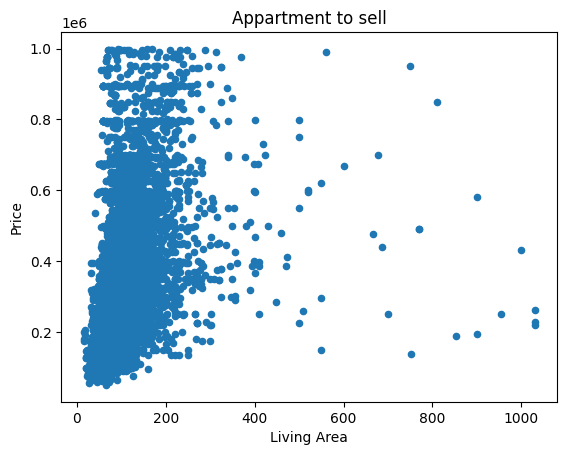

In [ ]:
#Plotting the correlation between Living Area and the Price for selling appartment
df_sell_appart.drop(df_sell_appart[(df_sell_appart['Living Area']>10000)].index, inplace=True) #deleting the extrem living area after seeing the first plot
df_sell_appart.plot(x='Living Area', y='Price', kind='scatter', title="Appartment to sell")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/733026422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart.drop(df_sell_appart[(df_sell_appart['Number of rooms']>14)].index, inplace=True) #deleting the extrem number of rooms after seeing the first plot


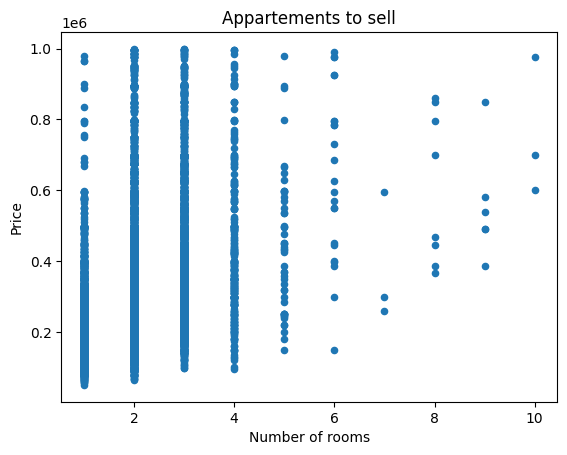

In [ ]:
#Plotting the correlation between Number of rooms and the Price for selling appartments
df_sell_appart.drop(df_sell_appart[(df_sell_appart['Number of rooms']>14)].index, inplace=True) #deleting the extrem number of rooms after seeing the first plot
df_sell_appart.plot(x='Number of rooms', y='Price', kind='scatter', title="Appartements to sell")
plt.show()

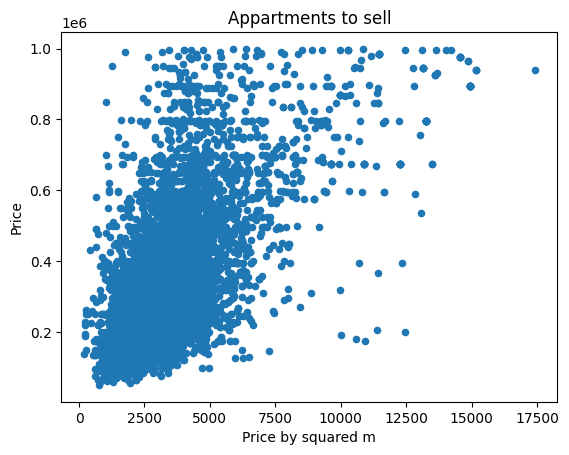

In [ ]:
#Plotting the correlation between price by squared m and the price for selling appartments
df_sell_appart.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartments to sell")
plt.show()

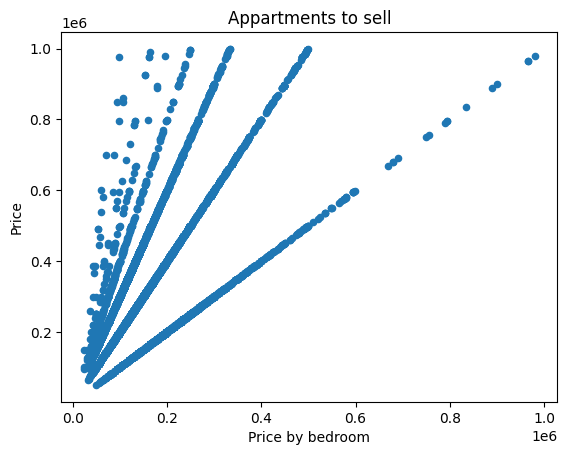

In [ ]:
#Plotting the correlation between price by bedroom and the price for selling appartments
df_sell_appart.plot(x='Price by bedroom', y='Price', kind='scatter', title="Appartments to sell")
plt.show()

In [ ]:
#Selling houses

#Correlation between Price and Living Area for selling houses
col1, col2 = "Price", "Living Area"
corr = df_sell_house[col1].corr(df_sell_house[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

#Correlation between Price and Numbers of rooms for selling houses
col3 = "Number of rooms"
corr = df_sell_house[col1].corr(df_sell_house[col3])
print("Correlation between ", col1, " and ", col3, "is: ", round(corr, 2))

#Correlation between Price and Price by squared m for selling houses
col4 = "Price by squared m"
corr = df_sell_house[col1].corr(df_sell_house[col4])
print("Correlation between ", col1, " and ", col4, "is: ", round(corr, 2))

#Correlation between Price and Price by bedroom m for selling houses
col5 = "Price by bedroom"
corr = df_sell_house[col1].corr(df_sell_house[col5])
print("Correlation between ", col1, " and ", col5, "is: ", round(corr, 2))

Correlation between  Price  and  Living Area is:  0.22
Correlation between  Price  and  Number of rooms is:  0.03
Correlation between  Price  and  Price by squared m is:  0.52
Correlation between  Price  and  Price by bedroom is:  0.72


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/791613506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house.drop(df_sell_house[(df_sell_house['Living Area']>5000)].index, inplace=True) #deleting the extrem Living Area after seeing the first plot


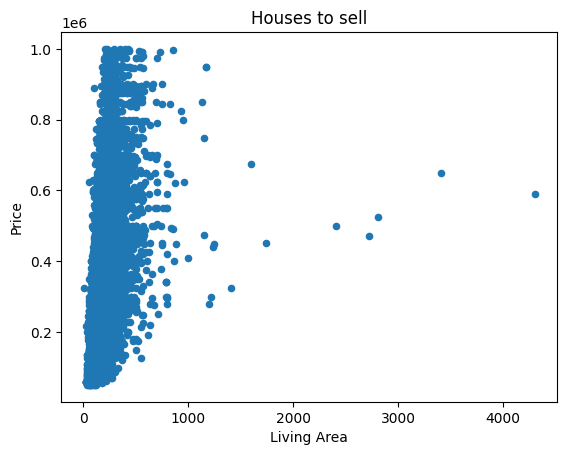

In [ ]:
#Plotting the correlation between Living Area and the Price for selling houses
df_sell_house.drop(df_sell_house[(df_sell_house['Living Area']>5000)].index, inplace=True) #deleting the extrem Living Area after seeing the first plot
df_sell_house.plot(x='Living Area', y='Price', kind='scatter', title="Houses to sell")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1535278355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house.drop(df_sell_house[(df_sell_house['Number of rooms']>20)].index, inplace=True) #deleting the extrem Number of rooms after seeing the first plot


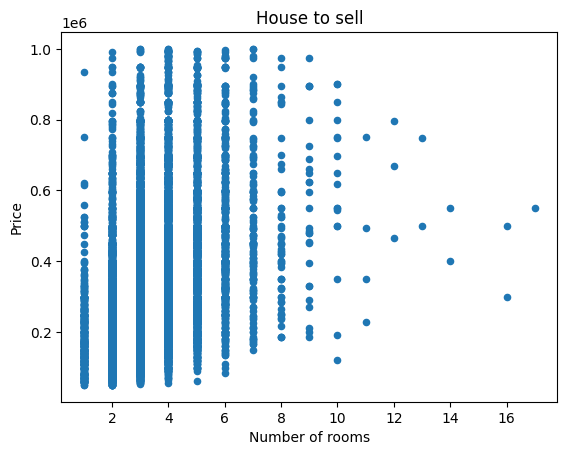

In [ ]:
#Plotting the correlation between Number of rooms and the Price for selling houses
df_sell_house.drop(df_sell_house[(df_sell_house['Number of rooms']>20)].index, inplace=True) #deleting the extrem Number of rooms after seeing the first plot
df_sell_house.plot(x='Number of rooms', y='Price', kind='scatter', title="House to sell")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/3530751293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house.drop(df_sell_house[(df_sell_house['Price by squared m']>8000)].index, inplace=True) #deleting the extrem price by squared m after seeing the first plot


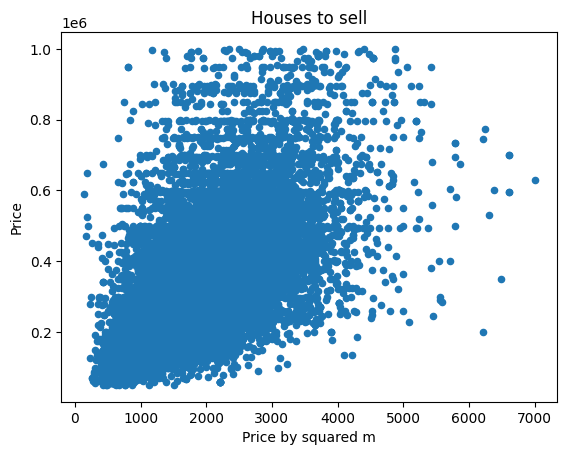

In [ ]:
#Plotting the correlation between price by squared m and the price for selling houses
df_sell_house.drop(df_sell_house[(df_sell_house['Price by squared m']>8000)].index, inplace=True) #deleting the extrem price by squared m after seeing the first plot
df_sell_house.plot(x='Price by squared m', y='Price', kind='scatter', title="Houses to sell")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1942197128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_house.drop(df_sell_house[(df_sell_house['Price by bedroom']>600000)].index, inplace=True) #deleting the extrem Price by bedroom after seeing the first plot


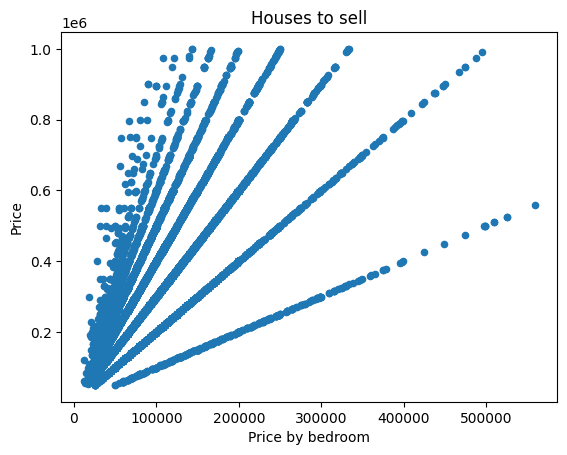

In [ ]:
#Plotting the correlation between price by bedroom and the price for renting appartment
df_sell_house.drop(df_sell_house[(df_sell_house['Price by bedroom']>600000)].index, inplace=True) #deleting the extrem Price by bedroom after seeing the first plot
df_sell_house.plot(x='Price by bedroom', y='Price', kind='scatter', title="Houses to sell")
plt.show()

In [ ]:
#Defining a function to extract a range of zipcode given to this function from one defined dataframe with a give column 
#name (where the zipcode are)

def taking_zip_code_desired_from_df (begin_zipcode, end_zipcode, df, name_of_col_zipcode):

    #Making a bool series
    bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
    
    #Returning dataframe with zipcode between above values
    df_desired = df[bool_series]

    return df_desired


In [ ]:
#Defining the function to calcul the min, max, mean for one province to rent (by default) or to buy

def min_max_mean_df (df, colum_name, province_name, rent = True):  

    min = df[colum_name].min().round(2)
    max = df[colum_name].max().round(2)
    mean = df[colum_name].mean().round(2)

    diction = {province_name : mean}

    if rent == True :
        selling_or_renting = "renting"
    else :
        selling_or_renting = "selling"

    print(f"The minimal {selling_or_renting} {colum_name} in {province_name} Province is {min.round(2)} €/m2")
    print(f"The maximal {selling_or_renting} {colum_name} in {province_name} Province is {max.round(2)} €/m2")
    print(f"The mean {selling_or_renting} {colum_name} in {province_name} Province is {mean.round(2)} €/m2")

    return diction



The minimal renting Price by squared m in Brussels Province is 2.81 €/m2
The maximal renting Price by squared m in Brussels Province is 45.45 €/m2
The mean renting Price by squared m in Brussels Province is 15.04 €/m2


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


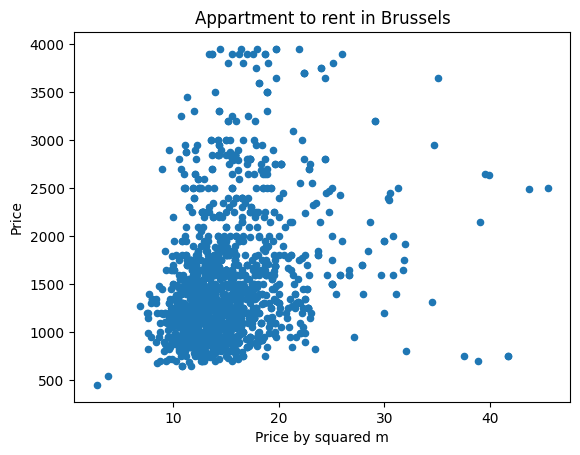

There are 1498 rows in our database named df_rent_appart_bru
There are 15 columns in our database named df_rent_appart_bru


In [ ]:
#Brussels
df_rent_appart_bru = taking_zip_code_desired_from_df(1000, 1299, df_rent_appart ,"zipcode")
mean_bru = min_max_mean_df(df_rent_appart_bru ,"Price by squared m", "Brussels") #the dictionnary to store the province's name and its average square m price for renting appartment
mean = {} #the dictionnary to store all the dictionnaries with the province's name and the average square m price for renting appartment
mean.update(mean_bru) #adding the dictionnary mean_bru to the main dictionnary mean who stores all the dictionnaries for each province


#Plotting the correlation between Price by square m and the renting price for renting appartment in Brussels
df_rent_appart_bru.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Brussels")
plt.show()




/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Brabant wallon Province is 2.08 €/m2
The maximal renting Price by squared m in Brabant wallon Province is 45.62 €/m2
The mean renting Price by squared m in Brabant wallon Province is 11.29 €/m2


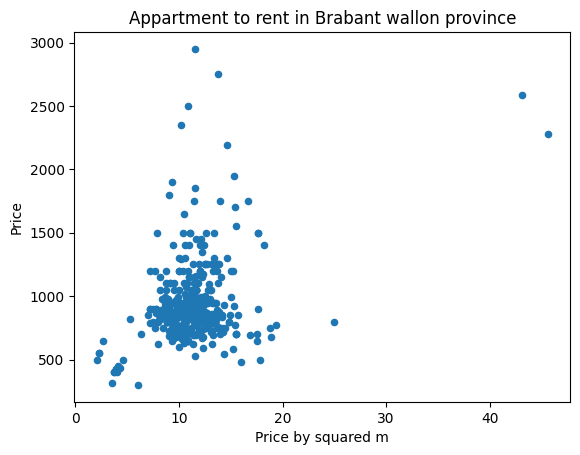

In [ ]:
#BW
df_rent_appart_bw = taking_zip_code_desired_from_df(1300, 1499, df_rent_appart ,"zipcode")
mean_bw = min_max_mean_df(df_rent_appart_bw ,"Price by squared m", "Brabant wallon") #dictionnary to store the province's name and the average square m price to rent a appart in this province

mean.update(mean_bw) #adding the dictionnary mean_bw to the main dictionnary mean who stores all the dictionnaries for each province

#Plotting the correlation between Price by square m and the renting price for renting appartment in Brabant wallon
df_rent_appart_bw.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Brabant wallon province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


There are 669 rows in our database named df_rent_appart_bf_final
There are 15 columns in our database named df_rent_appart_bf_final
The minimal renting Price by squared m in Brabant flamand Province is 4.81 €/m2
The maximal renting Price by squared m in Brabant flamand Province is 50.0 €/m2
The mean renting Price by squared m in Brabant flamand Province is 11.28 €/m2


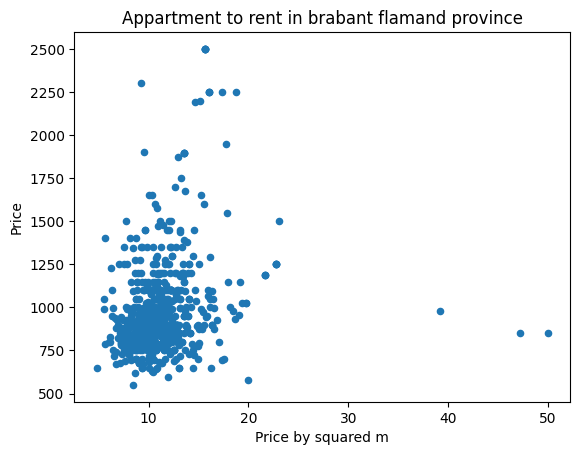

In [ ]:
#Brabant flamand
df_rent_appart_bf = taking_zip_code_desired_from_df(1500, 1999, df_rent_appart ,"zipcode")
df_rent_appart_bf2 = taking_zip_code_desired_from_df(3000, 3499, df_rent_appart ,"zipcode")
df_rent_appart_bf_final = pd.concat([df_rent_appart_bf, df_rent_appart_bf2], axis = 0)
how_many_columns_rows_df(df_rent_appart_bf_final)
mean_bf = min_max_mean_df(df_rent_appart_bf_final ,"Price by squared m", "Brabant flamand") #dictionnary to store the province's name and the average square m price to rent a appart in this province
mean.update(mean_bf) #adding the dictionnary mean_bf to the main dictionnary mean who stores all the dictionnaries for each province


#Plotting the correlation between Price by square m and the renting price for renting appartment in Brabant flamand
df_rent_appart_bf_final.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in brabant flamand province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Anvers Province is 2.75 €/m2
The maximal renting Price by squared m in Anvers Province is 36.36 €/m2
The mean renting Price by squared m in Anvers Province is 10.94 €/m2


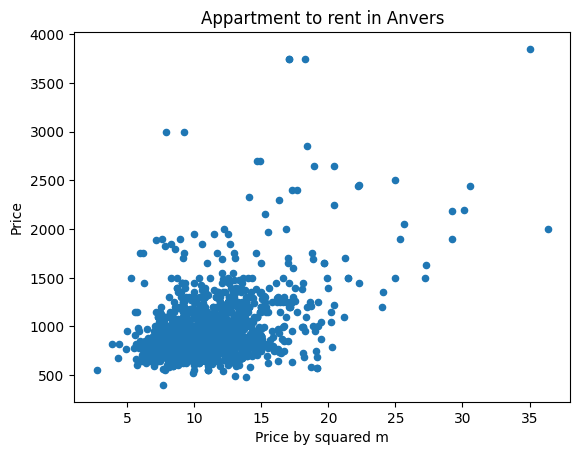

In [ ]:
#Anvers
df_rent_appart_anv = taking_zip_code_desired_from_df(2000, 2999, df_rent_appart ,"zipcode")
mean_anv = min_max_mean_df(df_rent_appart_anv ,"Price by squared m", "Anvers") #dictionnary to store the province's name and the average square m price to rent a appart in this province

mean.update(mean_anv) #adding the dictionnary mean_anv to the main dictionnary mean who stores all the dictionnaries for each province


#Plotting the correlation between Price by square m and the renting price for renting appartment in Anvers
df_rent_appart_anv.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Anvers")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Limbourg Province is 3.69 €/m2
The maximal renting Price by squared m in Limbourg Province is 23.21 €/m2
The mean renting Price by squared m in Limbourg Province is 8.93 €/m2


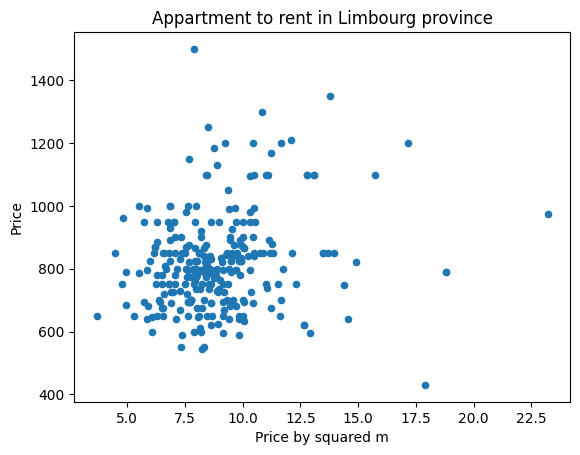

In [ ]:
#Limbourg
df_rent_appart_lim = taking_zip_code_desired_from_df(3500, 3999, df_rent_appart ,"zipcode")
mean_lim = min_max_mean_df(df_rent_appart_lim ,"Price by squared m", "Limbourg") #dictionnary to store the province's name and the average square m price to rent a appart in this province

mean.update(mean_lim) #adding the dictionnary mean_lim to the main dictionnary mean who stores all the dictionnaries for each province


#Plotting the correlation between Price by square m and the renting price for renting appartment in Limbourg
df_rent_appart_lim.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Limbourg province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Liege Province is 2.33 €/m2
The maximal renting Price by squared m in Liege Province is 28.98 €/m2
The mean renting Price by squared m in Liege Province is 9.45 €/m2


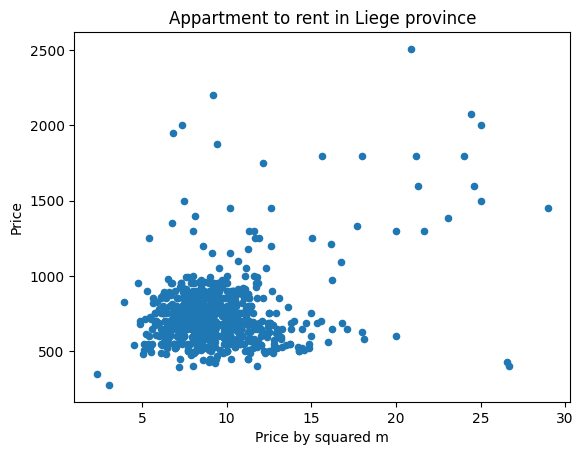

In [ ]:
#Liège
df_rent_appart_liege = taking_zip_code_desired_from_df(4000, 4999, df_rent_appart ,"zipcode")
mean_liege = min_max_mean_df(df_rent_appart_liege ,"Price by squared m", "Liege") #dictionnary to store the province's name and the average square m price to rent a appart in this province

mean.update(mean_liege) #adding the dictionnary mean_liege to the main dictionnary mean who stores all the dictionnaries for each province


#Plotting the correlation between Price by square m and the renting price for renting appartment in Liege
df_rent_appart_liege.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Liege province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Namur Province is 2.4 €/m2
The maximal renting Price by squared m in Namur Province is 18.75 €/m2
The mean renting Price by squared m in Namur Province is 9.89 €/m2


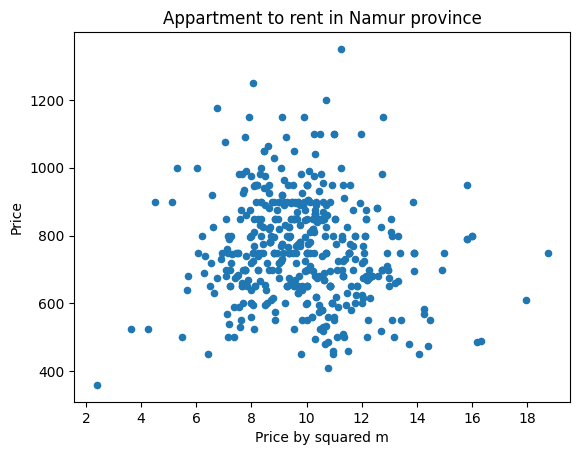

In [ ]:
#Namur
df_rent_appart_nam = taking_zip_code_desired_from_df(5000, 5680, df_rent_appart ,"zipcode")
mean_nam = min_max_mean_df(df_rent_appart_nam ,"Price by squared m", "Namur") #dictionnary to store the province's name and the average square m price to rent a appart in this province

mean.update(mean_nam) #adding the dictionnary mean_nam to the main dictionnary mean who stores all the dictionnaries for each province


#Plotting the correlation between Price by square m and the renting price for renting appartment in Namur
df_rent_appart_nam.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Namur province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Hainaut Province is 1.82 €/m2
The maximal renting Price by squared m in Hainaut Province is 23.33 €/m2
The mean renting Price by squared m in Hainaut Province is 9.11 €/m2


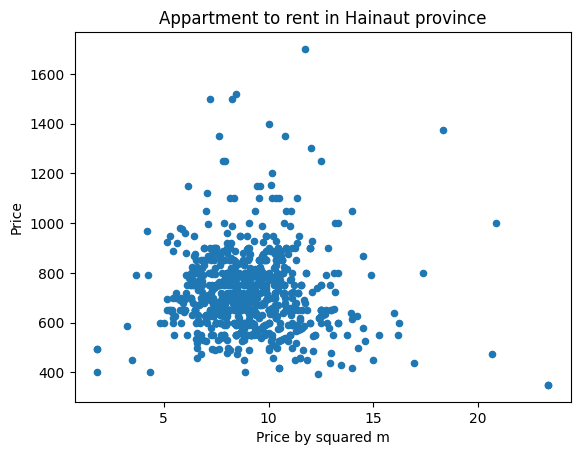

In [ ]:
#Hainaut
df_rent_appart_hai = taking_zip_code_desired_from_df(6000, 6599, df_rent_appart ,"zipcode")
df_rent_appart_hai2 = taking_zip_code_desired_from_df(7000, 7999, df_rent_appart ,"zipcode")
df_rent_appart_hai_final = pd.concat([df_rent_appart_hai, df_rent_appart_hai2], axis = 0)

mean_hai = min_max_mean_df(df_rent_appart_hai_final ,"Price by squared m", "Hainaut") #dictionnary to store the province's name and the average square m price to rent a appart in this province

mean.update(mean_hai) #adding the dictionnary mean_hai to the main dictionnary mean who stores all the dictionnaries for each province


#Plotting the correlation between Price by square m and the renting price for renting appartment in Hainaut
df_rent_appart_hai_final.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Hainaut province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Luxembourg Province is 3.83 €/m2
The maximal renting Price by squared m in Luxembourg Province is 17.5 €/m2
The mean renting Price by squared m in Luxembourg Province is 9.61 €/m2


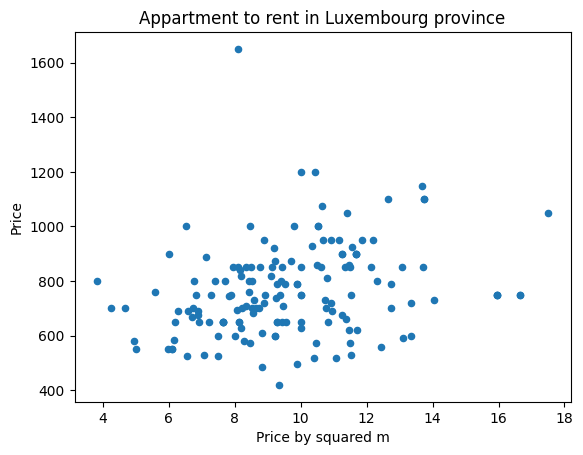

In [ ]:
#Luxembourg
df_rent_appart_lux = taking_zip_code_desired_from_df(6600, 6999, df_rent_appart ,"zipcode")
mean_lux = min_max_mean_df(df_rent_appart_lux ,"Price by squared m", "Luxembourg") #dictionnary to store the province's name and the average square m price to rent a appart in this province

mean.update(mean_lux) #adding the dictionnary mean_lux to the main dictionnary mean who stores all the dictionnaries for each province


#Plotting the correlation between Price by square m and the renting price for renting appartment in Luxembourg
df_rent_appart_lux.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Luxembourg province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/491473168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_appart_fl_occi.drop(df_rent_appart_fl_occi[(df_rent_appart_fl_occi['Price by squared m'] < 1)].index, inplace=True) #Deleting the row where the price by squared m is under 1 because the Price was 45 a month for the appartment there is a mistake I think...


The minimal renting Price by squared m in Flandre occidentale Province is 3.12 €/m2
The maximal renting Price by squared m in Flandre occidentale Province is 44.67 €/m2
The mean renting Price by squared m in Flandre occidentale Province is 10.06 €/m2


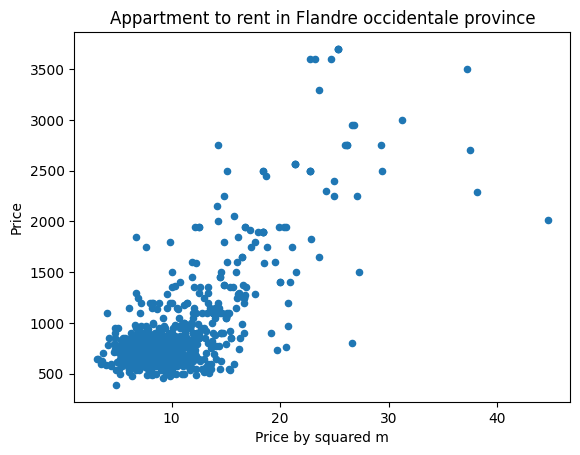

In [ ]:
#Flandre occidentale
df_rent_appart_fl_occi = taking_zip_code_desired_from_df(8000, 8999, df_rent_appart ,"zipcode")

df_rent_appart_fl_occi.drop(df_rent_appart_fl_occi[(df_rent_appart_fl_occi['Price by squared m'] < 1)].index, inplace=True) #Deleting the row where the price by squared m is under 1 because the Price was 45 a month for the appartment there is a mistake I think...

mean_fl_occi = min_max_mean_df(df_rent_appart_fl_occi ,"Price by squared m", "Flandre occidentale") #dictionnary to store the province's name and the average square m price to rent a appart in this province

mean.update(mean_fl_occi) #adding the dictionnary mean_fl_occi to the main dictionnary mean who stores all the dictionnaries for each province


#Plotting the correlation between Price by square m and the renting price for renting appartment in Flandre occidentale
df_rent_appart_fl_occi.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Flandre occidentale province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Flandre orientale Province is 3.82 €/m2
The maximal renting Price by squared m in Flandre orientale Province is 58.49 €/m2
The mean renting Price by squared m in Flandre orientale Province is 9.33 €/m2


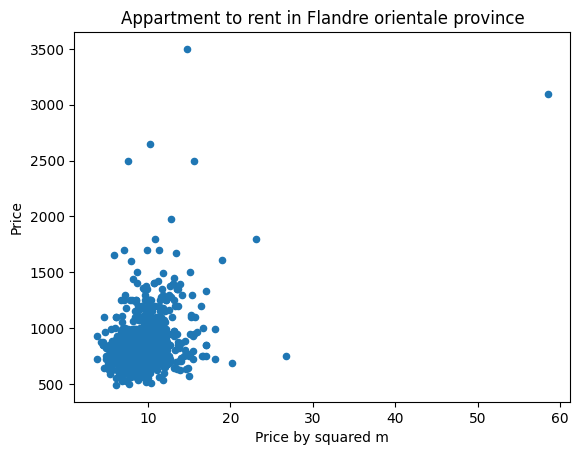

In [ ]:
#Flandre orientale
df_rent_appart_fl_ori = taking_zip_code_desired_from_df(9000, 9999, df_rent_appart ,"zipcode")
mean_fl_ori = min_max_mean_df(df_rent_appart_fl_ori ,"Price by squared m", "Flandre orientale") #dictionnary to store the province's name and the average square m price to rent a appart in this province

mean.update(mean_fl_ori) #adding the dictionnary mean_fl_ori to the main dictionnary mean who stores all the dictionnaries for each province


#Plotting the correlation between Price by square m and the renting price for renting appartment in Flandre orientale
df_rent_appart_fl_ori.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to rent in Flandre orientale province")
plt.show()

,Province,Average renting price per square m
0,Brussels,15.04
1,Brabant wallon,11.29
2,Brabant flamand,11.28
3,Anvers,10.94
4,Limbourg,8.93
5,Liege,9.45
6,Namur,9.89
7,Hainaut,9.11
8,Luxembourg,9.61
9,Flandre occidentale,10.06


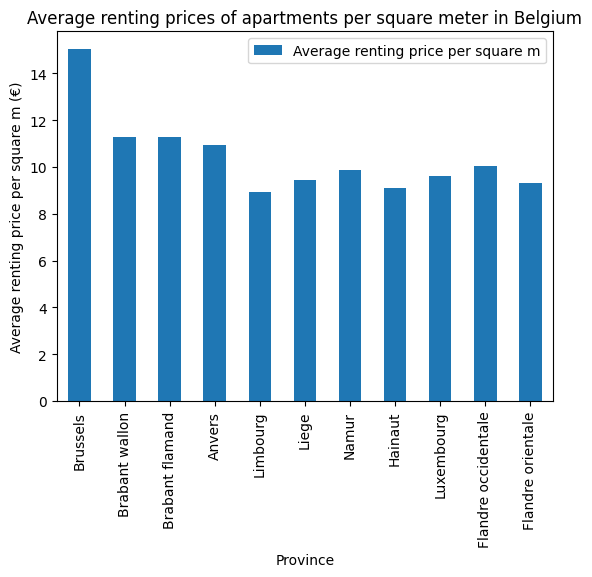

In [ ]:
#Making the dataframe with the province's name and the average square m price and plotting it

df_rent_province_to_plot = pd.DataFrame.from_dict(mean, orient="index").reset_index()
df_rent_province_to_plot.rename(columns={'index':'Province', 0:'Average renting price per square m'}, inplace=True) 

df_rent_province_to_plot.plot(x="Province", y='Average renting price per square m', kind='bar', title="Average renting prices of apartments per square meter in Belgium")
plt.xticks(rotation=90)
plt.ylabel("Average renting price per square m (€)")
plt.show

df_rent_province_to_plot

The minimal selling Price by squared m in Brussels Province is 1353.79 €/m2
The maximal selling Price by squared m in Brussels Province is 7523.08 €/m2
The mean selling Price by squared m in Brussels Province is 3663.24 €/m2


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


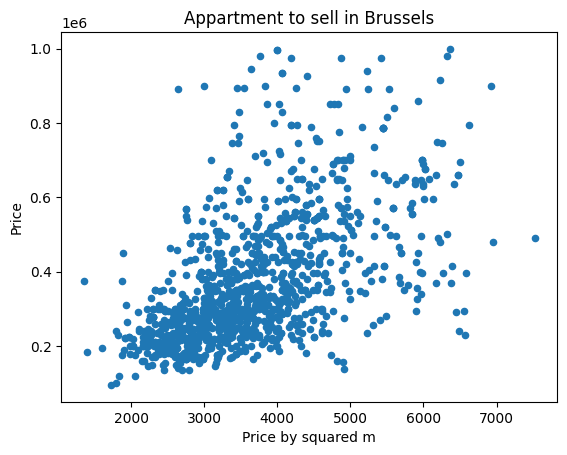

In [ ]:
#Preparing the data to plot with the sell_df

#Brussels
df_sell_appart_bru = taking_zip_code_desired_from_df(1000, 1299, df_sell_appart ,"zipcode")
mean_sell_bru = min_max_mean_df(df_sell_appart_bru ,"Price by squared m", "Brussels", rent=False)
mean_sell = {} #the dictionnary to store all the dictionnaries with the province's name and the average square m price for selling appartment
mean_sell.update(mean_sell_bru) #adding the dictionnary mean_sell_bru to the main dictionnary mean_sell who stores all the dictionnaries for each province

#Plotting the correlation between Price by square m and the renting price for selling appartment in Brussels
df_sell_appart_bru.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Brussels")
plt.show()

The minimal selling Price by squared m in Brabant wallon Province is 183.51 €/m2
The maximal selling Price by squared m in Brabant wallon Province is 6046.51 €/m2
The mean selling Price by squared m in Brabant wallon Province is 3194.08 €/m2


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/3283043634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart_bw.drop(df_sell_appart_bw[(df_sell_appart_bw['Price by squared m']<500)].index, inplace=True)


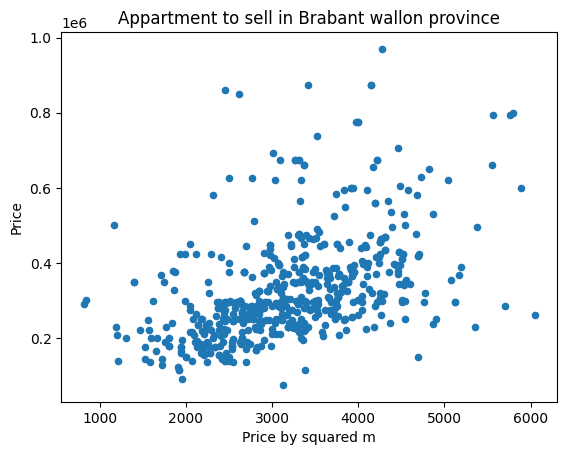

In [ ]:
#BW
df_sell_appart_bw = taking_zip_code_desired_from_df(1300, 1499, df_sell_appart ,"zipcode")
mean_sell_bw = min_max_mean_df(df_sell_appart_bw ,"Price by squared m", "Brabant wallon", rent=False)

mean_sell.update(mean_sell_bw) #adding the dictionnary mean_sell_bw to the main dictionnary mean_sell who stores all the dictionnaries for each province

df_sell_appart_bw.drop(df_sell_appart_bw[(df_sell_appart_bw['Price by squared m']<500)].index, inplace=True)

#Plotting the correlation between Price by square m and the renting price for selling appartment in Brabant wallon
df_sell_appart_bw.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Brabant wallon province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


There are 1132 rows in our database named df_sell_appart_bf_final
There are 15 columns in our database named df_sell_appart_bf_final
The minimal selling Price by squared m in Brabant flamand Province is 595.24 €/m2
The maximal selling Price by squared m in Brabant flamand Province is 12437.5 €/m2
The mean selling Price by squared m in Brabant flamand Province is 3341.49 €/m2


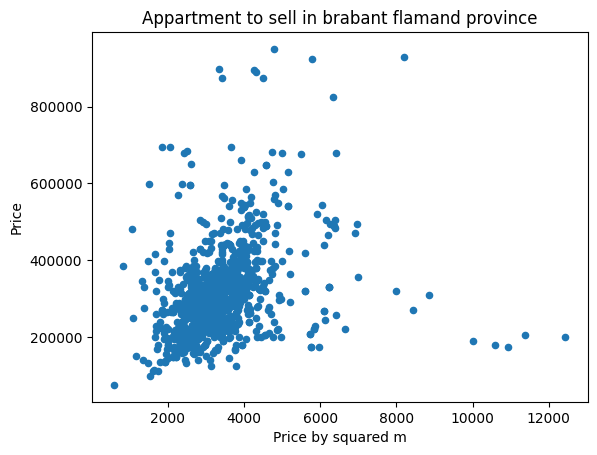

In [ ]:
#Brabant flamand
df_sell_appart_bf = taking_zip_code_desired_from_df(1500, 1999, df_sell_appart ,"zipcode")
df_sell_appart_bf2 = taking_zip_code_desired_from_df(3000, 3499, df_sell_appart ,"zipcode")
df_sell_appart_bf_final = pd.concat([df_sell_appart_bf, df_sell_appart_bf2], axis = 0)
how_many_columns_rows_df(df_sell_appart_bf_final)
mean_sell_bf = min_max_mean_df(df_sell_appart_bf_final ,"Price by squared m", "Brabant flamand", rent=False)
mean_sell.update(mean_sell_bf) #adding the dictionnary mean_sell_bf to the main dictionnary mean_sell who stores all the dictionnaries for each province

#Plotting the correlation between Price by square m and the renting price for selling appartment in Brabant flamand
df_sell_appart_bf_final.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in brabant flamand province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/962021396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart_anv.drop(df_sell_appart_anv[(df_sell_appart_anv['Price by squared m']<500)].index, inplace=True)


The minimal selling Price by squared m in Anvers Province is 221.83 €/m2
The maximal selling Price by squared m in Anvers Province is 10710.14 €/m2
The mean selling Price by squared m in Anvers Province is 3028.03 €/m2


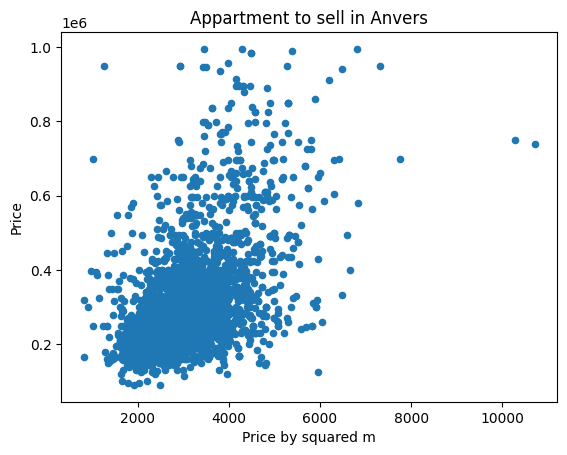

In [ ]:
#Anvers
df_sell_appart_anv = taking_zip_code_desired_from_df(2000, 2999, df_sell_appart ,"zipcode")
mean_sell_anv = min_max_mean_df(df_sell_appart_anv ,"Price by squared m", "Anvers", rent=False)
mean_sell.update(mean_sell_anv) #adding the dictionnary mean_sell_anv to the main dictionnary mean_sell who stores all the dictionnaries for each province
df_sell_appart_anv.drop(df_sell_appart_anv[(df_sell_appart_anv['Price by squared m']<500)].index, inplace=True)

#Plotting the correlation between Price by square m and the renting price for selling appartment in Anvers
df_sell_appart_anv.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Anvers")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Limbourg Province is 824.92 €/m2
The maximal selling Price by squared m in Limbourg Province is 7045.45 €/m2
The mean selling Price by squared m in Limbourg Province is 2728.52 €/m2


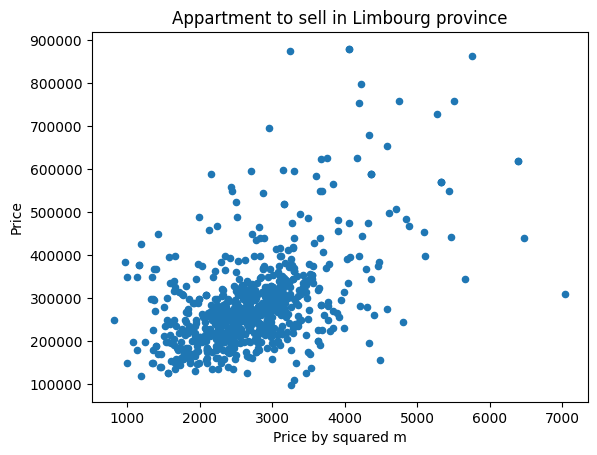

In [ ]:
#Limbourg
df_sell_appart_lim = taking_zip_code_desired_from_df(3500, 3999, df_sell_appart ,"zipcode")
mean_sell_lim = min_max_mean_df(df_sell_appart_lim ,"Price by squared m", "Limbourg", rent=False)
mean_sell.update(mean_sell_lim) #adding the dictionnary mean_sell_lim to the main dictionnary mean_sell who stores all the dictionnaries for each province

#Plotting the correlation between Price by square m and the renting price for selling appartment in Limbourg
df_sell_appart_lim.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Limbourg province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Liege Province is 261.52 €/m2
The maximal selling Price by squared m in Liege Province is 9727.27 €/m2
The mean selling Price by squared m in Liege Province is 2468.96 €/m2


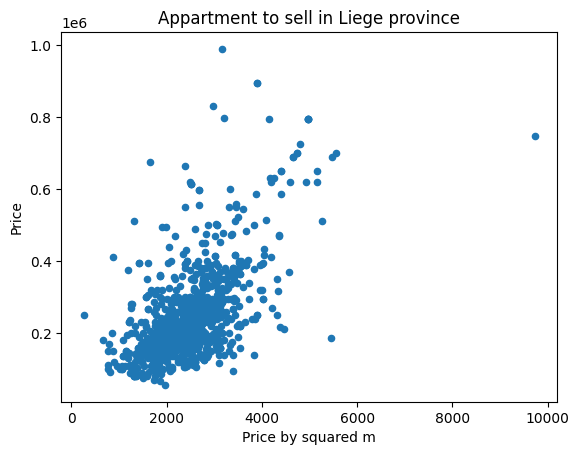

In [ ]:
#Liège
df_sell_appart_liege = taking_zip_code_desired_from_df(4000, 4999, df_sell_appart ,"zipcode")
mean_sell_liege = min_max_mean_df(df_sell_appart_liege ,"Price by squared m", "Liege", rent=False)
mean_sell.update(mean_sell_liege)#adding the dictionnary mean_sell_liege to the main dictionnary mean_sell who stores all the dictionnaries for each province



#Plotting the correlation between Price by square m and the renting price for selling appartment in Liege
df_sell_appart_liege.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Liege province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/478188672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_appart_nam.drop(df_sell_appart_nam[(df_sell_appart_nam['Price by squared m']<500)].index, inplace=True)


The minimal selling Price by squared m in Namur Province is 357.14 €/m2
The maximal selling Price by squared m in Namur Province is 5921.05 €/m2
The mean selling Price by squared m in Namur Province is 2510.49 €/m2


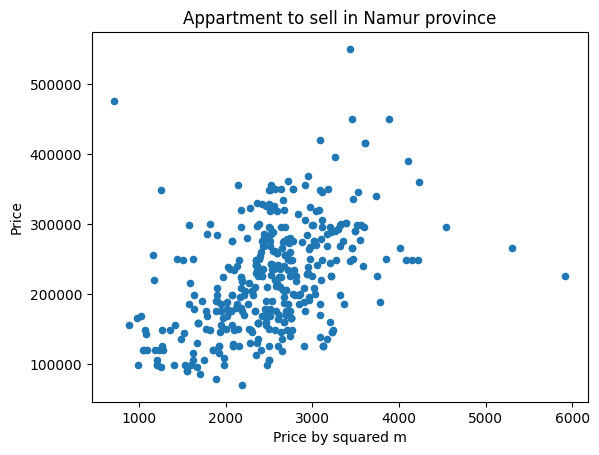

In [ ]:
#Namur
df_sell_appart_nam = taking_zip_code_desired_from_df(5000, 5680, df_sell_appart ,"zipcode")
mean_sell_nam = min_max_mean_df(df_sell_appart_nam ,"Price by squared m", "Namur", rent=False)
mean_sell.update(mean_sell_nam)#adding the dictionnary mean_sell_nam to the main dictionnary mean_sell who stores all the dictionnaries for each province

df_sell_appart_nam.drop(df_sell_appart_nam[(df_sell_appart_nam['Price by squared m']<500)].index, inplace=True)

#Plotting the correlation between Price by square m and the renting price for selling appartment in Namur
df_sell_appart_nam.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Namur province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)
/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Hainaut Province is 430.0 €/m2
The maximal selling Price by squared m in Hainaut Province is 5322.63 €/m2
The mean selling Price by squared m in Hainaut Province is 1987.05 €/m2


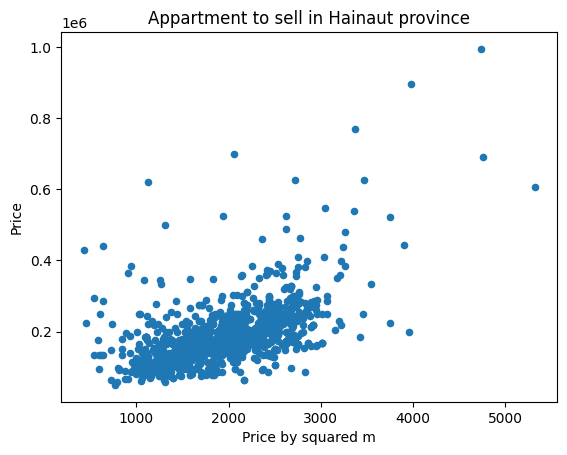

In [ ]:
#Hainaut
df_sell_appart_hai = taking_zip_code_desired_from_df(6000, 6599, df_sell_appart ,"zipcode")
df_sell_appart_hai2 = taking_zip_code_desired_from_df(7000, 7999, df_sell_appart ,"zipcode")
df_sell_appart_hai_final = pd.concat([df_sell_appart_hai, df_sell_appart_hai2], axis = 0)

mean_sell_hai = min_max_mean_df(df_sell_appart_hai_final ,"Price by squared m", "Hainaut", rent=False)
mean_sell.update(mean_sell_hai) #adding the dictionnary mean_sell_hai to the main dictionnary mean_sell who stores all the dictionnaries for each province

#Plotting the correlation between Price by square m and the renting price for selling appartment in Hainaut
df_sell_appart_hai_final.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Hainaut province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal renting Price by squared m in Luxembourg Province is 270.91 €/m2
The maximal renting Price by squared m in Luxembourg Province is 4551.28 €/m2
The mean renting Price by squared m in Luxembourg Province is 2558.86 €/m2


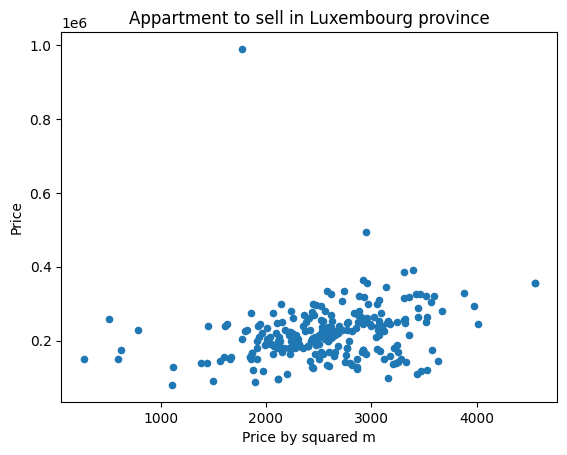

In [ ]:
#Luxembourg
df_sell_appart_lux = taking_zip_code_desired_from_df(6600, 6999, df_sell_appart ,"zipcode")
mean_sell_lux = min_max_mean_df(df_sell_appart_lux ,"Price by squared m", "Luxembourg")
mean_sell.update(mean_sell_lux) #adding the dictionnary mean_sell_lux to the main dictionnary mean_sell who stores all the dictionnaries for each province

#Plotting the correlation between Price by square m and the renting price for selling appartment in Luxembourg
df_sell_appart_lux.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Luxembourg province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Flandre occidentale Province is 214.08 €/m2
The maximal selling Price by squared m in Flandre occidentale Province is 17407.41 €/m2
The mean selling Price by squared m in Flandre occidentale Province is 3965.69 €/m2


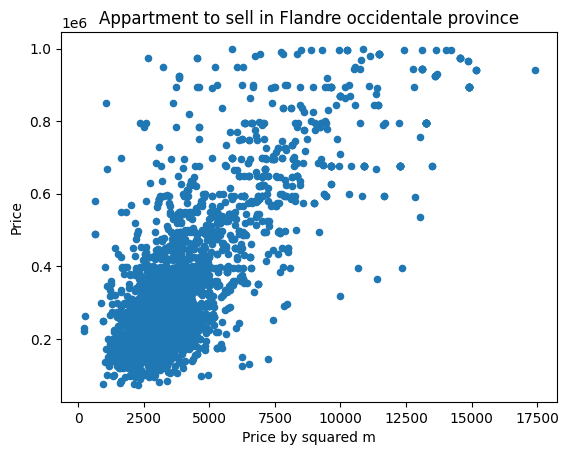

In [ ]:
#Flandre occidentale
df_sell_appart_fl_occi = taking_zip_code_desired_from_df(8000, 8999, df_sell_appart ,"zipcode")

mean_sell_fl_occi = min_max_mean_df(df_sell_appart_fl_occi ,"Price by squared m", "Flandre occidentale", rent=False)
mean_sell.update(mean_sell_fl_occi) #adding the dictionnary mean_sell_fl_occi to the main dictionnary mean_sell who stores all the dictionnaries for each province

#Plotting the correlation between Price by square m and the renting price for selling appartment in Flandre occidentale
df_sell_appart_fl_occi.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Flandre occidentale province")
plt.show()

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_17379/1167210783.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bool_series = df[name_of_col_zipcode].between(begin_zipcode, end_zipcode, inclusive = True)


The minimal selling Price by squared m in Flandre orientale Province is 216.67 €/m2
The maximal selling Price by squared m in Flandre orientale Province is 7956.75 €/m2
The mean selling Price by squared m in Flandre orientale Province is 3080.73 €/m2


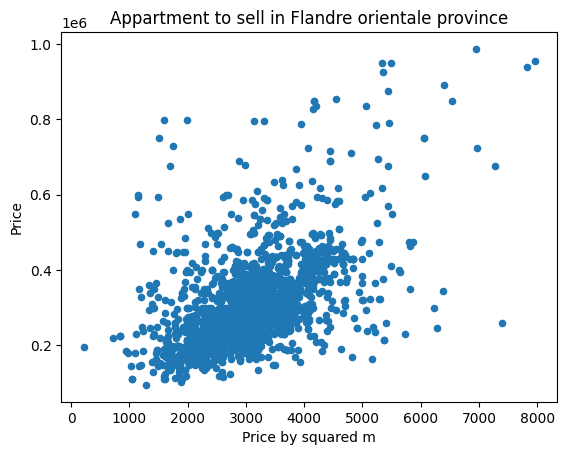

In [ ]:
#Flandre orientale
df_sell_appart_fl_ori = taking_zip_code_desired_from_df(9000, 9999, df_sell_appart ,"zipcode")
mean_sell_fl_ori = min_max_mean_df(df_sell_appart_fl_ori ,"Price by squared m", "Flandre orientale", rent=False)
mean_sell.update(mean_sell_fl_ori) #adding the dictionnary mean_sell_fl_ori to the main dictionnary mean_sell who stores all the dictionnaries for each province

#Plotting the correlation between Price by square m and the renting price for selling appartment in Flandre orientale
df_sell_appart_fl_ori.plot(x='Price by squared m', y='Price', kind='scatter', title="Appartment to sell in Flandre orientale province")
plt.show()

The mean renting price by square m in Belgium is : 10.45 €
The mean selling price by square m in Belgium is : 2957.01 €


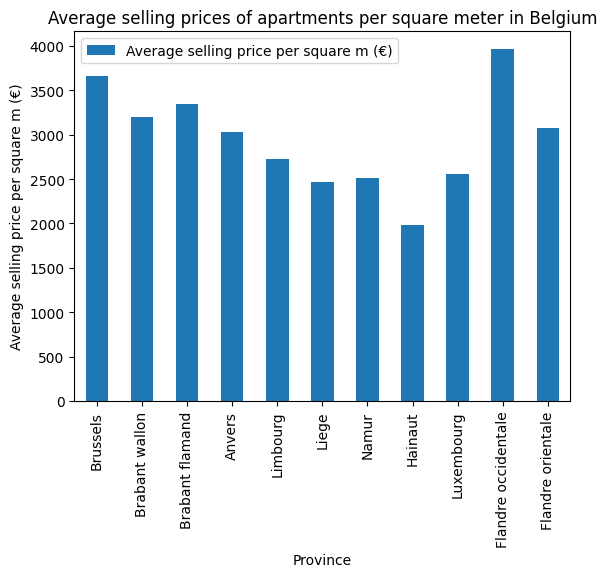

In [ ]:
#Making the dataframe with the province's name and the average square m price and plotting it

df_sell_province_to_plot = pd.DataFrame.from_dict(mean_sell, orient="index").reset_index()
df_sell_province_to_plot.rename(columns={'index':'Province', 0:'Average selling price per square m (€)'}, inplace=True) 

df_sell_province_to_plot.plot(x="Province", y='Average selling price per square m (€)', kind='bar', title="Average selling prices of apartments per square meter in Belgium")
plt.xticks(rotation=90)
plt.xlabel('Province')
plt.ylabel('Average selling price per square m (€)')
#plt.title("Average selling prices of apartments per square meter in Belgium")
plt.show

print(f"The mean renting price by square m in Belgium is : {df_rent_province_to_plot['Average renting price per square m'].mean().round(2)} €")
print(f"The mean selling price by square m in Belgium is : {df_sell_province_to_plot['Average selling price per square m (€)'].mean().round(2)} €")


               Province  Number of years to refund
7               Hainaut                  18.176667
0              Brussels                  20.297500
6                 Namur                  21.153333
5                 Liege                  21.772500
8            Luxembourg                  22.189167
3                Anvers                  23.065833
1        Brabant wallon                  23.575833
2       Brabant flamand                  24.685833
4              Limbourg                  25.462500
10    Flandre orientale                  27.516667
9   Flandre occidentale                  32.850000


<function matplotlib.pyplot.show(close=None, block=None)>

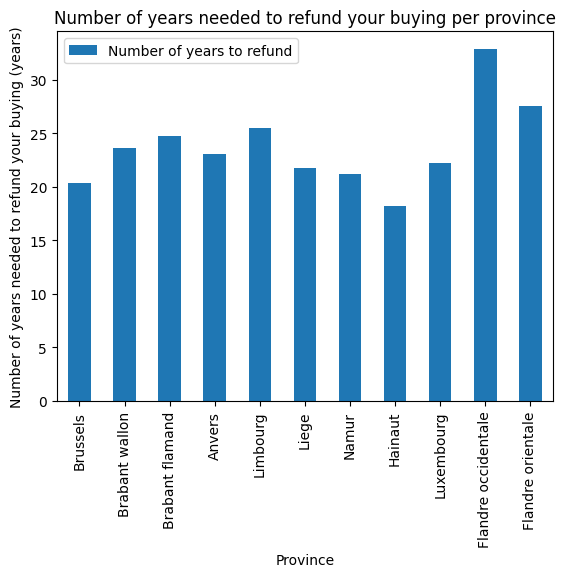

In [ ]:
#Creating a single dataframe with df_sell_province_to_plot and df_rent_province_to_plot

df_province = pd.concat([df_sell_province_to_plot, df_rent_province_to_plot], axis = 1)

#Deleting the duplicated columns
df_province = df_province.T.drop_duplicates().T

#Creating the Number of months column who will show us how many months is needed to refund your buying in months
df_province["Number of months"] = (df_sell_province_to_plot['Average selling price per square m (€)'] / df_rent_province_to_plot['Average renting price per square m']).round(2)

#Creating the column "Number of years to refund in converting "Number of months" column
df_province['Number of years to refund'] = df_province['Number of months'] / 12 

#Printing the best province where to buy an appart to refund it as soon as possible
print(df_province[['Province','Number of years to refund']].sort_values('Number of years to refund'))

#Plotting my results
df_province.plot(x="Province", y='Number of years to refund', kind='bar')

plt.xticks(rotation=90)
plt.xlabel('Province')
plt.ylabel('Number of years needed to refund your buying (years)')
plt.title("Number of years needed to refund your buying per province")
plt.show


In [ ]:
#The 10 most expensive municipalities where to rent a appartment by renting price
df_test = df_rent_appart.groupby('zipcode')['Price'].max()
df_test.sort_values(ascending=False).head(10)


zipcode
1000    3950.0
1050    3950.0
1180    3900.0
2000    3850.0
8300    3700.0
1040    3650.0
1160    3648.0
9000    3500.0
1200    3300.0
1150    3300.0
Name: Price, dtype: float64

In [ ]:
#TOP 10 of the most expensive municipalities by mean renting price for one appartment in Belgium
mean_price = df_rent_appart.groupby('zipcode')['Price'].mean().round(2)
top_10_mean = mean_price.sort_values(ascending=False).head(10)
print(top_10_mean)


zipcode
1933    1983.50
1050    1835.79
1150    1737.32
8300    1695.91
1180    1637.29
1060    1584.91
1000    1573.05
1040    1543.58
1160    1495.02
9080    1487.50
Name: Price, dtype: float64


In [ ]:
#TOP 10 of the most expensive municipalities by median price for one appartment in Belgium
top_10_median = df_rent_appart.groupby('zipcode')['Price'].median().sort_values(ascending=False).head(10)
print(top_10_median)

zipcode
1933    2072.5
1050    1650.0
1081    1650.0
1150    1550.0
1060    1515.0
9080    1487.5
8300    1450.0
3078    1400.0
1380    1400.0
1180    1400.0
Name: Price, dtype: float64


In [ ]:
#TOP 10 of the most expensive municipalities by squared m price for one appartment in Belgium
top_10_squared = df_rent_appart.groupby('zipcode')['Price by squared m'].max().round(2).sort_values(ascending=False).head(10)
print(top_10_squared)


zipcode
9000    58.49
3000    50.00
1348    45.62
1000    45.45
8000    44.67
1160    43.67
1040    39.07
8300    38.12
2000    36.36
1180    34.47
Name: Price by squared m, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

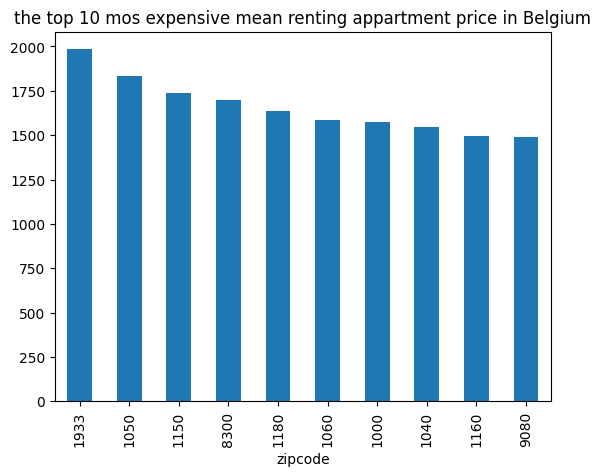

In [ ]:
top_10_mean.plot(x="zipcode", y='Mean price', kind='bar', title="the top 10 mos expensive mean renting appartment price in Belgium")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

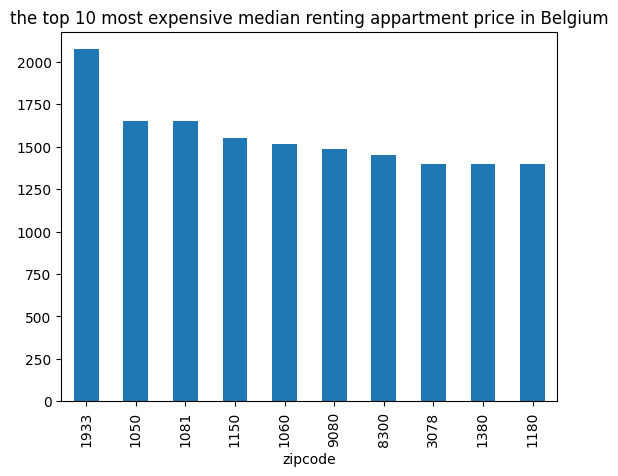

In [ ]:
top_10_median.plot(x="zipcode", y='Median price', kind='bar', title="the top 10 most expensive median renting appartment price in Belgium")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

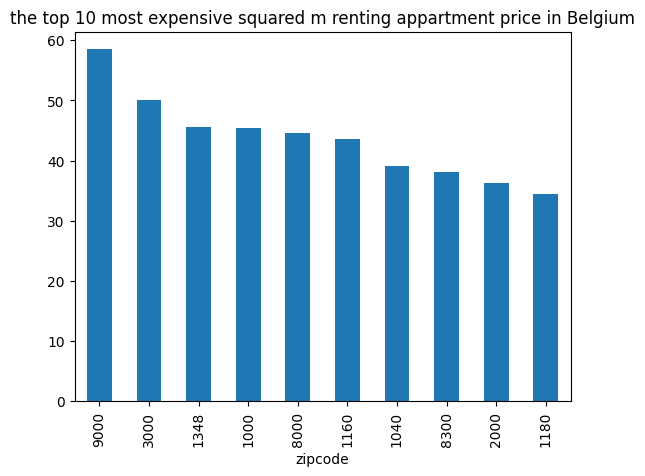

In [ ]:
top_10_squared.plot(x="zipcode", y='Mean price', kind='bar', title="the top 10 most expensive squared m renting appartment price in Belgium")
plt.xticks(rotation=90)
plt.show

In [ ]:
#The most expensive municipalities in Wallonia where to rent an appartment

df_rent_appart_wal = df_rent_appart[(df_rent_appart['zipcode'] >= 1300) & (df_rent_appart['zipcode'] <=1499)]
df_temp = df_rent_appart[(df_rent_appart['zipcode'] >= 4000) & (df_rent_appart['zipcode'] <= 7999)]
df_rent_appart_wal_final = pd.concat([df_rent_appart_wal, df_temp], axis = 0)

mean_price = df_rent_appart_wal_final.groupby('zipcode')['Price'].mean().sort_values(ascending=False).round(2)
median_price = df_rent_appart_wal_final.groupby('zipcode')['Price'].median().sort_values(ascending=False).round(2)
square_m_price = df_rent_appart_wal_final.groupby('zipcode')['Price by squared m'].mean().sort_values(ascending=False).round(2)


print(f"The top 10 most expensive cities by average price in wallonia are : {mean_price.head(10)}")
print(f"The top 10 most expensive cities by median price in wallonia are : {median_price.head(10)}")


The top 10 most expensive cities by average price in wallonia are : zipcode
1380    1347.22
1340    1305.00
4780    1275.00
4052    1216.67
1410    1208.82
1342    1200.00
1332    1155.62
1421    1100.00
6210    1100.00
1348    1091.57
Name: Price, dtype: float64
The top 10 most expensive cities by median price in wallonia are : zipcode
1380    1400.0
4780    1275.0
4052    1250.0
1342    1200.0
1340    1175.0
1310    1100.0
6210    1100.0
1421    1100.0
4340    1081.5
1332    1050.0
Name: Price, dtype: float64


In [ ]:
print(f"The top 10 most expensive cities by average square m price in wallonia are : {square_m_price.head(10)}")

The top 10 most expensive cities by average square m price in wallonia are : zipcode
6747    16.67
7643    16.20
1348    15.60
1410    13.21
6780    13.19
1435    12.89
4340    12.84
5022    12.73
1490    12.51
7181    12.08
Name: Price by squared m, dtype: float64
